<a href="https://www.kaggle.com/code/mikedelong/python-scatterplots-everywhere?scriptVersionId=140714114" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
df = pd.read_csv(filepath_or_buffer='/kaggle/input/tiktok-profiles-data/TikTok profiles dataset (Public web data).csv', index_col=['id'],
                parse_dates=['timestamp']).drop(columns=['create_time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 6794435137251820550 to 7038705671954744367
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   timestamp                1000 non-null   datetime64[ns]
 1   account_id               1000 non-null   object        
 2   nickname                 1000 non-null   object        
 3   biography                997 non-null    object        
 4   awg_engagement_rate      1000 non-null   float64       
 5   comment_engagement_rate  1000 non-null   float64       
 6   like_engagement_rate     1000 non-null   float64       
 7   bio_link                 191 non-null    object        
 8   is_verified              1000 non-null   bool          
 9   followers                1000 non-null   int64         
 10  following                1000 non-null   int64         
 11  likes                    1000 non-null   int64         
 12  v

In [2]:
df.head()

,timestamp,account_id,nickname,biography,awg_engagement_rate,comment_engagement_rate,like_engagement_rate,bio_link,is_verified,followers,following,likes,videos_count,top_videos,url,profile_pic_url
id,,,,,,,,,,,,,,,,
6794435137251820550,2023-08-01,a.r.m.y664,❤️❤️❤️,nazywam się Basia 🇵🇱+🇺🇸 moja mama jest z USA 🖤...,0.049630,0.004473,0.045157,NaN,False,1755,1443,1586,20,https://www.tiktok.com/@a.r.m.y664/video/68236...,https://www.tiktok.com/@a.r.m.y664,https://p77-sign-va.tiktokcdn.com/musically-ma...
7019722709156430853,2023-08-01,a2_9r,ايمن الفستقي🍺🥂🥃,حسابي الاصلي تيكتككك(_8_ytp_,0.059322,0.004358,0.054964,NaN,False,354,1422,3843,225,https://www.tiktok.com/@a2_9r/video/7218348887...,https://www.tiktok.com/@a2_9r,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...
6826677567140873222,2023-07-30,ti.po.check,All,Активный пользователь ТикТока 🌝\nМеня зовут BD...,0.001399,0.000058,0.001341,NaN,False,1960,243,24000,228,https://www.tiktok.com/@ti.po.check/video/6984...,https://www.tiktok.com/@ti.po.check,https://p58-sign-sg.tiktokcdn.com/aweme/720x72...
6809397670235407365,2023-08-06,nutrifersanort,L.N Fernanda Sánchez,"Nutrióloga, educadora en diabetes.",0.469767,0.004651,0.465116,NaN,False,43,41,100,5,https://www.tiktok.com/@nutrifersanort/video/7...,https://www.tiktok.com/@nutrifersanort,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...
6810526136080483334,2023-07-25,bhgdee,D💲,Ig-bhg.dee📸\nSc-dannieo2099 👻\nFb- frank matth...,0.122283,0.008152,0.114130,NaN,False,276,2262,126,4,https://www.tiktok.com/@bhgdee/video/719722663...,https://www.tiktok.com/@bhgdee,https://p16-sign.tiktokcdn-us.com/tos-useast5-...


In [3]:
df.nunique()

timestamp                    20
account_id                 1000
nickname                    998
biography                   986
awg_engagement_rate        1000
comment_engagement_rate     987
like_engagement_rate        998
bio_link                    191
is_verified                   2
followers                   867
following                   665
likes                       844
videos_count                461
top_videos                 1000
url                         551
profile_pic_url            1000
dtype: int64

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Axes: xlabel='following', ylabel='log10_followers'>

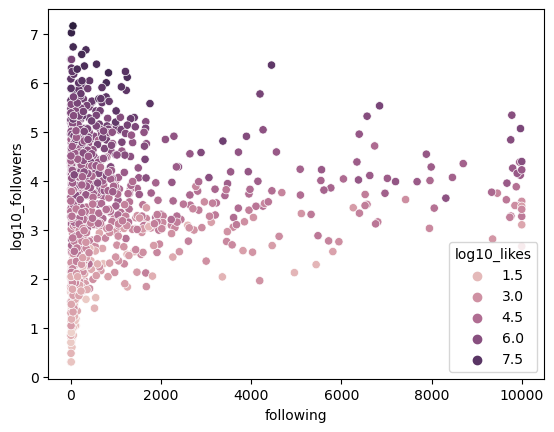

In [4]:
from seaborn import scatterplot
from math import log10
# we have outliers so we use log10 to pull them back into our graph
for column in ['followers', 'following', 'likes', 'videos_count']:
    df['log10_' + column] = df[column].apply(lambda x: log10(1 + x))
scatterplot(data=df, x='following', y='log10_followers', hue='log10_likes', )

I guess it's not surprising that followers and likes are essentially linearly related and following is independent. We can confirm this impression by graphing the same data in a different way.

<Axes: xlabel='log10_followers', ylabel='log10_likes'>

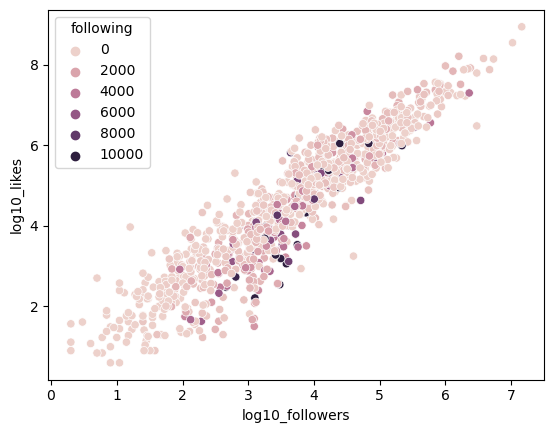

In [5]:
scatterplot(data=df, hue='following', x='log10_followers', y='log10_likes', )

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


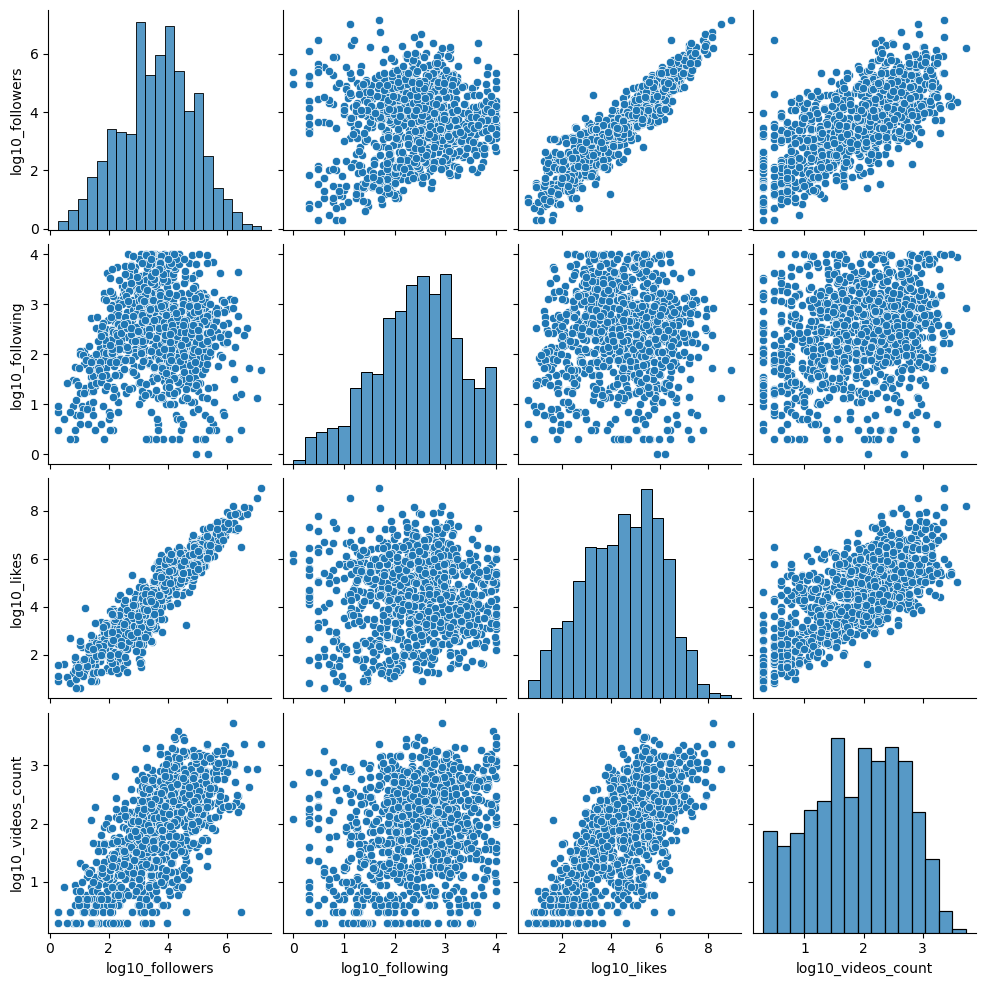

In [6]:
from seaborn import pairplot
pairplot(data=df[[item for item in df.columns.tolist() if item.startswith('log10_')]])

Following really is unrelated to the others.